In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1. Specify Pathfile

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# 2. Specify Number of Classes

In [3]:
NUM_CLASSES = 56

# 3. Reading Dataset

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2)+1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=42)

# 4. Training Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 256)               11008     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 56)                7224      
                                                                 
Total params: 51,128
Trainable params: 51,128
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
162/172 [===========================>..] - ETA: 0s - loss: 3.3337 - accuracy: 0.1325
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 2s 8ms/step - loss: 3.2967 - accuracy: 0.1370 - val_loss: 2.5437 - val_accuracy: 0.2773
Epoch 2/1000
161/172 [===========================>..] - ETA: 0s - loss: 2.3905 - accuracy: 0.2873
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 1s 4ms/step - loss: 2.3770 - accuracy: 0.2892 - val_loss: 1.7779 - val_accuracy: 0.5120
Epoch 3/1000
169/172 [============================>.] - ETA: 0s - loss: 1.9596 - accuracy: 0.3767
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 1s 4ms/step - loss: 1.9566 - accuracy: 0.3789 - val_loss: 1.3869 - val_accuracy: 0.5955
Epoch 4/1000
164/172 [===========================>..] - ETA: 0s - loss: 1.7693 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=32)

58/58 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.9001


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.37194206e-06 9.98054929e-07 2.21720416e-04 9.78291059e-12
 8.54267837e-11 6.96683564e-05 1.85479189e-06 1.57838118e-11
 1.64118974e-05 3.92083891e-12 9.58229157e-06 9.05742763e-06
 1.01001099e-01 1.63404831e-10 1.54222676e-11 1.12227017e-05
 3.05863950e-13 1.16447965e-12 2.27908768e-05 1.93665386e-04
 8.07290554e-01 1.30790090e-06 2.60259103e-09 1.98962097e-11
 8.83129314e-02 1.15140188e-06 1.55834891e-06 5.14405713e-07
 1.13213730e-07 1.58099422e-10 4.84709526e-05 9.99567565e-05
 5.00351973e-07 2.51302775e-03 2.65771161e-09 2.39447545e-05
 2.52389436e-05 4.15111279e-10 2.02588519e-11 3.27176899e-08
 4.02345345e-12 1.37857405e-05 5.55048736e-08 3.70659041e-06
 5.57814519e-06 2.73733503e-14 1.53304189e-10 9.74884369e-06
 5.34402716e-07 1.95446775e-15 1.69898405e-12 1.62902036e-09
 2.59212338e-05 1.33393235e-06 6.06048161e-05 7.46721851e-11]
20


# 5. Check Trained Model

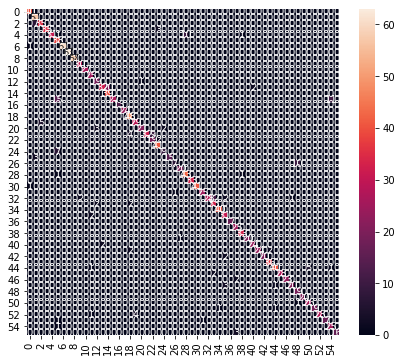

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.85      1.00      0.92        57
           2       0.88      0.83      0.85        42
           3       1.00      0.92      0.96        38
           4       1.00      0.72      0.84        43
           5       0.59      1.00      0.75        38
           6       1.00      0.98      0.99        62
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        58
           9       0.94      1.00      0.97        30
          10       1.00      1.00      1.00        27
          11       0.86      1.00      0.93        25
          12       0.79      0.95      0.86        20
          13       0.91      0.59      0.72        54
          14       0.66      0.97      0.79        40
          15       1.00      0.51      0.67        53
          16       1.00      1.00      1.00        13
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# 6. Check Trained Model

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/fr/jbv693556wl33l33vy0f6c080000gn/T/tmpysncchal/assets


54424

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 294 µs, sys: 769 µs, total: 1.06 ms
Wall time: 1.06 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.30049159e-06 8.85794009e-07 2.00101669e-04 9.96687281e-12
 8.25731775e-11 6.31622897e-05 1.88062927e-06 1.60871524e-11
 1.45604608e-05 4.28862891e-12 8.05784657e-06 9.32096100e-06
 8.77397805e-02 1.59397592e-10 1.47314314e-11 1.10527235e-05
 2.98367098e-13 1.13430977e-12 1.93840060e-05 1.86013436e-04
 8.11717868e-01 1.18025980e-06 2.81197088e-09 2.27335616e-11
 9.72308740e-02 1.00084662e-06 1.66945028e-06 4.51643359e-07
 1.08195700e-07 1.43207751e-10 4.48298779e-05 9.89781838e-05
 4.69400135e-07 2.48417375e-03 2.25363728e-09 2.11950664e-05
 2.18942678e-05 4.13780399e-10 1.99409430e-11 3.20332276e-08
 3.56351081e-12 1.27862895e-05 4.84823843e-08 3.01645241e-06
 6.09867948e-06 2.69045108e-14 1.41865020e-10 9.60105081e-06
 5.17446324e-07 1.52356261e-15 1.78297503e-12 1.43040757e-09
 2.52474401e-05 1.39147119e-06 6.10393763e-05 5.88745580e-11]
20
